In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model


In [2]:
# import datasets

cars_df = pd.read_csv('cars_df.csv')
cars_df

/var/folders/pf/nfj1603d1fjc2xkhkrlls95m0000gn/T/ipykernel_68380/2162614614.py:3: DtypeWarning: Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  cars_df = pd.read_csv('cars_df.csv')


,Mh,Cn,Ct,Cr,Ft,Status,year,Date of registration
0,HONDA UK,JA,M1,NaN,Petrol,P,2015,NaN
1,HONDA UK,JA,M1,NaN,Petrol,P,2015,NaN
2,HONDA UK,JA,M1,NaN,Petrol,P,2015,NaN
3,HONDA UK,JA,M1,NaN,Petrol,P,2015,NaN
4,HONDA UK,JA,M1,NaN,Petrol,P,2015,NaN
...,...,...,...,...,...,...,...,...
15048849,DUPLICATE,TOYOTA RAV4,M1,M1,PETROL,P,2022,2022-08-11
15048850,DUPLICATE,BAYON,M1,M1,PETROL,P,2022,2022-08-29
15048851,DUPLICATE,BAYON,M1,M1,PETROL,P,2022,2022-08-29
15048852,DUPLICATE,I 30,M1,M1,PETROL,P,2022,2022-04-05


In [3]:
charging_df = pd.read_csv('charging_df.csv')
charging_df

,Unnamed: 0,operator,type_of_charging_equipment,number_of_charging_points,connected_load,plug_types_1,plug_types_2,plug_types_3,plug_types_4,p1_kw,...,p4_kw,district_city,city,zip_code,street,house_number,secondary_address,date_of_commissioning,latitude,longitude
0,0,GGEW AG,Standard_charger,1,4.6,AC Steckdose Typ 2,NaN,NaN,NaN,4.6,...,NaN,Landkreis Bergstraße,Lorsch,64653,Klosterstr.,23,NaN,2017-01-02,49.653064,8.572109
1,1,Pfalzwerke AG,Super_charger,2,75.0,AC Steckdose Typ 2,DC Kupplung Combo,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Lorsch,64653,Nibelungenstraße,135-137,NaN,2021-04-27,49.652969,8.554764
2,2,ENTEGA Energie GmbH,Standard_charger,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Krumbacher Str.,39,NaN,2017-11-21,49.658037,8.787881
3,3,Entega Plus GmbH,Standard_charger,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Erbacher Str.,102,a,2022-04-08,49.663670,8.796830
4,4,Entega Plus GmbH,Standard_charger,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Schulstr.,12,NaN,2022-04-08,49.646360,8.781410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,36765,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,108,NaN,2016-06-01,51.301227,12.384566
36766,36766,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Scheffelstraße,35,NaN,2016-06-01,51.311695,12.372912
36767,36767,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,55,NaN,2018-07-05,51.305046,12.382487
36768,36768,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Richard Lehmann Straße,120,NaN,2019-08-12,51.314325,12.397213


In [4]:
charging_df.columns

Index(['Unnamed: 0', 'operator', 'type_of_charging_equipment',
       'number_of_charging_points', 'connected_load', 'plug_types_1',
       'plug_types_2', 'plug_types_3', 'plug_types_4', 'p1_kw', 'p2_kw',
       'p3_kw', 'p4_kw', 'district_city', 'city', 'zip_code', 'street',
       'house_number', 'secondary_address', 'date_of_commissioning',
       'latitude', 'longitude'],
      dtype='object')

In [5]:
charging_df = charging_df.drop(['Unnamed: 0'], axis=1)
charging_df.columns

Index(['operator', 'type_of_charging_equipment', 'number_of_charging_points',
       'connected_load', 'plug_types_1', 'plug_types_2', 'plug_types_3',
       'plug_types_4', 'p1_kw', 'p2_kw', 'p3_kw', 'p4_kw', 'district_city',
       'city', 'zip_code', 'street', 'house_number', 'secondary_address',
       'date_of_commissioning', 'latitude', 'longitude'],
      dtype='object')

In [6]:
cars_df.columns

Index(['Mh', 'Cn', 'Ct', 'Cr', 'Ft', 'Status', 'year', 'Date of registration'], dtype='object')

In [7]:
cols = []
for i in range(len(cars_df.columns)):
    cols.append(cars_df.columns[i].lower().replace(' ', '_'))
cars_df.columns = cols

print(cars_df.columns)

Index(['mh', 'cn', 'ct', 'cr', 'ft', 'status', 'year', 'date_of_registration'], dtype='object')


In [8]:
new_column_names = {'mh': 'brand', 'cn': 'commercial_name', 'ct': 'category','cr': 'category_2', 'ft': 'fuel_type'}
cars_df.rename(columns=new_column_names, inplace=True)

In [9]:
cars_df.columns

Index(['brand', 'commercial_name', 'category', 'category_2', 'fuel_type',
       'status', 'year', 'date_of_registration'],
      dtype='object')

# Find numerical and categorical columns

In [10]:
charging_df.dtypes

operator                       object
type_of_charging_equipment     object
number_of_charging_points       int64
connected_load                float64
plug_types_1                   object
plug_types_2                   object
plug_types_3                   object
plug_types_4                   object
p1_kw                         float64
p2_kw                         float64
p3_kw                         float64
p4_kw                         float64
district_city                  object
city                           object
zip_code                        int64
street                         object
house_number                   object
secondary_address              object
date_of_commissioning          object
latitude                      float64
longitude                     float64
dtype: object

In [11]:
charging_df.select_dtypes(np.number)

,number_of_charging_points,connected_load,p1_kw,p2_kw,p3_kw,p4_kw,zip_code,latitude,longitude
0,1,4.6,4.6,NaN,NaN,NaN,64653,49.653064,8.572109
1,2,75.0,22.0,50.0,NaN,NaN,64653,49.652969,8.554764
2,2,44.0,22.0,22.0,NaN,NaN,64658,49.658037,8.787881
3,2,22.0,22.0,22.0,NaN,NaN,64658,49.663670,8.796830
4,2,22.0,22.0,22.0,NaN,NaN,64658,49.646360,8.781410
...,...,...,...,...,...,...,...,...,...
36765,2,30.0,22.0,22.0,NaN,NaN,4277,51.301227,12.384566
36766,2,30.0,22.0,22.0,NaN,NaN,4277,51.311695,12.372912
36767,2,30.0,22.0,22.0,NaN,NaN,4277,51.305046,12.382487
36768,2,30.0,22.0,22.0,NaN,NaN,4277,51.314325,12.397213


In [12]:
charging_df.select_dtypes(object)

,operator,type_of_charging_equipment,plug_types_1,plug_types_2,plug_types_3,plug_types_4,district_city,city,street,house_number,secondary_address,date_of_commissioning
0,GGEW AG,Standard_charger,AC Steckdose Typ 2,NaN,NaN,NaN,Landkreis Bergstraße,Lorsch,Klosterstr.,23,NaN,2017-01-02
1,Pfalzwerke AG,Super_charger,AC Steckdose Typ 2,DC Kupplung Combo,NaN,NaN,Landkreis Bergstraße,Lorsch,Nibelungenstraße,135-137,NaN,2021-04-27
2,ENTEGA Energie GmbH,Standard_charger,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Landkreis Bergstraße,Fürth,Krumbacher Str.,39,NaN,2017-11-21
3,Entega Plus GmbH,Standard_charger,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Landkreis Bergstraße,Fürth,Erbacher Str.,102,a,2022-04-08
4,Entega Plus GmbH,Standard_charger,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Landkreis Bergstraße,Fürth,Schulstr.,12,NaN,2022-04-08
...,...,...,...,...,...,...,...,...,...,...,...,...
36765,Stadtwerke Leipzig GmbH,Standard_charger,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Kreisfreie Stadt Leipzig,Leipzig,Bornaische Straße,108,NaN,2016-06-01
36766,Stadtwerke Leipzig GmbH,Standard_charger,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Kreisfreie Stadt Leipzig,Leipzig,Scheffelstraße,35,NaN,2016-06-01
36767,Stadtwerke Leipzig GmbH,Standard_charger,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Kreisfreie Stadt Leipzig,Leipzig,Bornaische Straße,55,NaN,2018-07-05
36768,Stadtwerke Leipzig GmbH,Standard_charger,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,Kreisfreie Stadt Leipzig,Leipzig,Richard Lehmann Straße,120,NaN,2019-08-12


In [13]:
cars_df.dtypes

brand                   object
commercial_name         object
category                object
category_2              object
fuel_type               object
status                  object
year                     int64
date_of_registration    object
dtype: object

In [14]:
cars_df.select_dtypes(np.number)

,year
0,2015
1,2015
2,2015
3,2015
4,2015
...,...
15048849,2022
15048850,2022
15048851,2022
15048852,2022


In [15]:
cars_df.select_dtypes(object)

,brand,commercial_name,category,category_2,fuel_type,status,date_of_registration
0,HONDA UK,JA,M1,NaN,Petrol,P,NaN
1,HONDA UK,JA,M1,NaN,Petrol,P,NaN
2,HONDA UK,JA,M1,NaN,Petrol,P,NaN
3,HONDA UK,JA,M1,NaN,Petrol,P,NaN
4,HONDA UK,JA,M1,NaN,Petrol,P,NaN
...,...,...,...,...,...,...,...
15048849,DUPLICATE,TOYOTA RAV4,M1,M1,PETROL,P,2022-08-11
15048850,DUPLICATE,BAYON,M1,M1,PETROL,P,2022-08-29
15048851,DUPLICATE,BAYON,M1,M1,PETROL,P,2022-08-29
15048852,DUPLICATE,I 30,M1,M1,PETROL,P,2022-04-05


# Locating and dealing with NaN values

In [16]:
charging_df.isna().sum()

operator                          0
type_of_charging_equipment        0
number_of_charging_points         0
connected_load                    0
plug_types_1                      0
plug_types_2                   5659
plug_types_3                  34537
plug_types_4                  35638
p1_kw                             0
p2_kw                          5641
p3_kw                         34537
p4_kw                         35639
district_city                     0
city                              0
zip_code                          0
street                            0
house_number                      0
secondary_address             32147
date_of_commissioning             0
latitude                          0
longitude                         0
dtype: int64

In [17]:
charging_df['secondary_address'].value_counts
charging_df['secondary_address'].head(10)

0    NaN
1    NaN
2    NaN
3      a
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: secondary_address, dtype: object

In [18]:
#deciding to drop the secondary address column, it doesn't provide relevant information
charging_df = charging_df.drop(['secondary_address'], axis=1)
charging_df.columns

Index(['operator', 'type_of_charging_equipment', 'number_of_charging_points',
       'connected_load', 'plug_types_1', 'plug_types_2', 'plug_types_3',
       'plug_types_4', 'p1_kw', 'p2_kw', 'p3_kw', 'p4_kw', 'district_city',
       'city', 'zip_code', 'street', 'house_number', 'date_of_commissioning',
       'latitude', 'longitude'],
      dtype='object')

In [19]:
round(charging_df.isna().sum()/len(charging_df),4)*100 

operator                       0.00
type_of_charging_equipment     0.00
number_of_charging_points      0.00
connected_load                 0.00
plug_types_1                   0.00
plug_types_2                  15.39
plug_types_3                  93.93
plug_types_4                  96.92
p1_kw                          0.00
p2_kw                         15.34
p3_kw                         93.93
p4_kw                         96.92
district_city                  0.00
city                           0.00
zip_code                       0.00
street                         0.00
house_number                   0.00
date_of_commissioning          0.00
latitude                       0.00
longitude                      0.00
dtype: float64

In [20]:
#deciding to drop the pulg types different than the first one and p2_kw, p3_kw and p4_kw
charging_df = charging_df.drop(['plug_types_2','plug_types_3', 'plug_types_4', 'p2_kw','p3_kw','p4_kw'], axis=1)
charging_df.columns

Index(['operator', 'type_of_charging_equipment', 'number_of_charging_points',
       'connected_load', 'plug_types_1', 'p1_kw', 'district_city', 'city',
       'zip_code', 'street', 'house_number', 'date_of_commissioning',
       'latitude', 'longitude'],
      dtype='object')

In [21]:
charging_df.isna().sum()

operator                      0
type_of_charging_equipment    0
number_of_charging_points     0
connected_load                0
plug_types_1                  0
p1_kw                         0
district_city                 0
city                          0
zip_code                      0
street                        0
house_number                  0
date_of_commissioning         0
latitude                      0
longitude                     0
dtype: int64

In [22]:
charging_df.shape

(36770, 14)

In [23]:
 #now for the cars_df
cars_df.isna().sum()

brand                         0
commercial_name            8640
category                      0
category_2               122783
fuel_type                    74
status                        0
year                          0
date_of_registration    9947727
dtype: int64

In [24]:
cars_df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Electric', 'LPG', nan, 'NG-biomethane',
       'Petrol-electric', 'E85', 'Diesel-electric', 'DIESEL', 'PETROL',
       'ELECTRIC', 'NG-BIOMETHANE', 'Petrol/Electric', 'Diesel/Electric',
       'NG', 'PETROL/ELECTRIC', 'DIESEL/ELECTRIC', 'diesel', 'petrol',
       'petrol/electric', 'lpg', 'electric', 'diesel/electric',
       'ng-biomethane', 'unknown', 'ng', 'e85', 'HYDROGEN', 'UNKNOWN'],
      dtype=object)

In [25]:
cars_df['fuel_type']=np.where(cars_df['fuel_type'].isnull(),'UNKNOWN',cars_df['fuel_type'])
cars_df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Electric', 'LPG', 'UNKNOWN', 'NG-biomethane',
       'Petrol-electric', 'E85', 'Diesel-electric', 'DIESEL', 'PETROL',
       'ELECTRIC', 'NG-BIOMETHANE', 'Petrol/Electric', 'Diesel/Electric',
       'NG', 'PETROL/ELECTRIC', 'DIESEL/ELECTRIC', 'diesel', 'petrol',
       'petrol/electric', 'lpg', 'electric', 'diesel/electric',
       'ng-biomethane', 'unknown', 'ng', 'e85', 'HYDROGEN'], dtype=object)

In [26]:
#deciding to drop the column category_2 as it doesn't influence my results
cars_df = cars_df.drop(['category_2'], axis=1)
cars_df.columns

Index(['brand', 'commercial_name', 'category', 'fuel_type', 'status', 'year',
       'date_of_registration'],
      dtype='object')

In [27]:
#thinking about it, it doesn't make any sense to have the category, as we are not interested on that, droppping it
cars_df = cars_df.drop(['category'], axis=1)
cars_df.columns

Index(['brand', 'commercial_name', 'fuel_type', 'status', 'year',
       'date_of_registration'],
      dtype='object')

In [28]:
cars_df['commercial_name'].unique()

array(['JA', nan, 'I30', ..., 'LADA NIVA 4X4 BROWN ED',
       'LADA NIVA 4X4 PUR', 'PROACE CITY VERSO ELECTRIC'], dtype=object)

In [29]:
cars_df['commercial_name']=np.where(cars_df['commercial_name'].isnull(),'UNKNOWN',cars_df['commercial_name'])
cars_df['commercial_name'].unique()

array(['JA', 'UNKNOWN', 'I30', ..., 'LADA NIVA 4X4 BROWN ED',
       'LADA NIVA 4X4 PUR', 'PROACE CITY VERSO ELECTRIC'], dtype=object)

In [30]:
cars_df['date_of_registration'] = pd.to_datetime(cars_df['date_of_registration'])

# Extract month and year
cars_df['month'] = cars_df['date_of_registration'].dt.month


cars_df.head()

,brand,commercial_name,fuel_type,status,year,date_of_registration,month
0,HONDA UK,JA,Petrol,P,2015,NaT,NaN
1,HONDA UK,JA,Petrol,P,2015,NaT,NaN
2,HONDA UK,JA,Petrol,P,2015,NaT,NaN
3,HONDA UK,JA,Petrol,P,2015,NaT,NaN
4,HONDA UK,JA,Petrol,P,2015,NaT,NaN


In [31]:
cars_df.isna().sum()

brand                         0
commercial_name               0
fuel_type                     0
status                        0
year                          0
date_of_registration    9947727
month                   9947727
dtype: int64

In [32]:
cars_df['month']=np.where(cars_df['month'].isnull(),'Undefined',cars_df['month'])
cars_df['month'].unique()

array(['Undefined', '2.0', '4.0', '7.0', '3.0', '1.0', '12.0', '9.0',
       '10.0', '6.0', '5.0', '11.0', '8.0'], dtype=object)

In [33]:
#since we already have year and month (if available) in other columns, dropping the date_of_registration column
cars_df = cars_df.drop(['date_of_registration'], axis=1)
cars_df.columns

Index(['brand', 'commercial_name', 'fuel_type', 'status', 'year', 'month'], dtype='object')

In [34]:
cars_df['status'].unique()

array(['P'], dtype=object)

In [35]:
#dropping status too as it doesn't say anything regarding our inquiry
cars_df = cars_df.drop(['status'], axis=1)
cars_df.columns

Index(['brand', 'commercial_name', 'fuel_type', 'year', 'month'], dtype='object')

In [36]:
cars_df.isna().sum()

brand              0
commercial_name    0
fuel_type          0
year               0
month              0
dtype: int64

# Checking for duplicates

In [37]:
charging_duplicates = charging_df[charging_df.duplicated()]
charging_duplicates

,operator,type_of_charging_equipment,number_of_charging_points,connected_load,plug_types_1,p1_kw,district_city,city,zip_code,street,house_number,date_of_commissioning,latitude,longitude
170,Energieservice Rhein-Main GmbH,Standard_charger,2,22.0,AC Steckdose Typ 2,11.0,Landkreis Groß-Gerau,Rüsselsheim am Main,65428,Mainzer Straße,0,2021-09-01,49.992109,8.393946
171,Energieservice Rhein-Main GmbH,Standard_charger,2,22.0,AC Steckdose Typ 2,11.0,Landkreis Groß-Gerau,Rüsselsheim am Main,65428,Mainzer Straße,0,2021-09-01,49.992109,8.393946
172,Energieservice Rhein-Main GmbH,Standard_charger,2,22.0,AC Steckdose Typ 2,11.0,Landkreis Groß-Gerau,Rüsselsheim am Main,65428,Mainzer Straße,0,2021-09-01,49.992109,8.393946
175,Energieservice Rhein-Main GmbH,Standard_charger,2,22.0,AC Steckdose Typ 2,11.0,Landkreis Groß-Gerau,Rüsselsheim am Main,65428,Mainzer Straße,0,2021-09-01,49.991961,8.394010
176,Energieservice Rhein-Main GmbH,Standard_charger,2,22.0,AC Steckdose Typ 2,11.0,Landkreis Groß-Gerau,Rüsselsheim am Main,65428,Mainzer Straße,0,2021-09-01,49.991961,8.394010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36181,Mer Germany GmbH,Super_charger,2,900.0,DC Kupplung Combo,300.0,Kreisfreie Stadt Zweibrücken,Zweibrücken,66482,Stockholmer Straße,0,2020-11-09,49.229229,7.410162
36201,Mer Germany GmbH,Standard_charger,2,44.0,AC Steckdose Typ 2,22.0,Landkreis Altenkirchen (Westerwald),Mudersbach,57555,Stahlwerkstraße,36,2022-03-01,50.830028,7.951412
36498,TotalEnergies,Standard_charger,1,22.0,AC Steckdose Typ 2,22.0,Landkreis Vulkaneifel,Nürburg,53520,Parkstraße,1,2022-08-30,50.341223,7.000408
36499,TotalEnergies,Standard_charger,1,22.0,AC Steckdose Typ 2,22.0,Landkreis Vulkaneifel,Nürburg,53520,Parkstraße,1,2022-08-30,50.341223,7.000408


In [38]:
charging_duplicates.shape

(489, 14)

In [39]:
charging_df.shape

(36770, 14)

In [40]:
#dropping duplicates as we have them with latitude and longitude level of granularity
charging1_df = charging_df.drop_duplicates()

In [41]:
charging1_df

,operator,type_of_charging_equipment,number_of_charging_points,connected_load,plug_types_1,p1_kw,district_city,city,zip_code,street,house_number,date_of_commissioning,latitude,longitude
0,GGEW AG,Standard_charger,1,4.6,AC Steckdose Typ 2,4.6,Landkreis Bergstraße,Lorsch,64653,Klosterstr.,23,2017-01-02,49.653064,8.572109
1,Pfalzwerke AG,Super_charger,2,75.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Lorsch,64653,Nibelungenstraße,135-137,2021-04-27,49.652969,8.554764
2,ENTEGA Energie GmbH,Standard_charger,2,44.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Fürth,64658,Krumbacher Str.,39,2017-11-21,49.658037,8.787881
3,Entega Plus GmbH,Standard_charger,2,22.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Fürth,64658,Erbacher Str.,102,2022-04-08,49.663670,8.796830
4,Entega Plus GmbH,Standard_charger,2,22.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Fürth,64658,Schulstr.,12,2022-04-08,49.646360,8.781410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,108,2016-06-01,51.301227,12.384566
36766,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Scheffelstraße,35,2016-06-01,51.311695,12.372912
36767,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,55,2018-07-05,51.305046,12.382487
36768,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Richard Lehmann Straße,120,2019-08-12,51.314325,12.397213


In [42]:
charging_df.shape

(36770, 14)

In [43]:
36770-36281

489

In [44]:
numerical_cars=cars_df.select_dtypes(np.number)
numerical_cars
#no neeed to analyze it as a numerical variable

,year
0,2015
1,2015
2,2015
3,2015
4,2015
...,...
15048849,2022
15048850,2022
15048851,2022
15048852,2022


In [45]:
numerical_charging= charging1_df.select_dtypes(np.number)
numerical_charging

,number_of_charging_points,connected_load,p1_kw,zip_code,latitude,longitude
0,1,4.6,4.6,64653,49.653064,8.572109
1,2,75.0,22.0,64653,49.652969,8.554764
2,2,44.0,22.0,64658,49.658037,8.787881
3,2,22.0,22.0,64658,49.663670,8.796830
4,2,22.0,22.0,64658,49.646360,8.781410
...,...,...,...,...,...,...
36765,2,30.0,22.0,4277,51.301227,12.384566
36766,2,30.0,22.0,4277,51.311695,12.372912
36767,2,30.0,22.0,4277,51.305046,12.382487
36768,2,30.0,22.0,4277,51.314325,12.397213


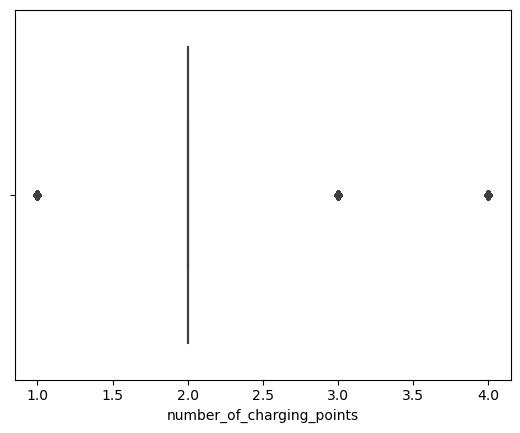

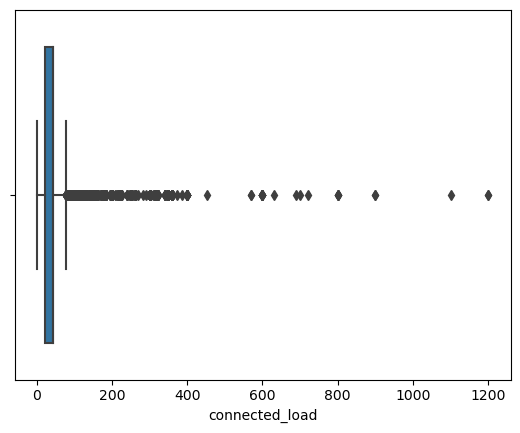

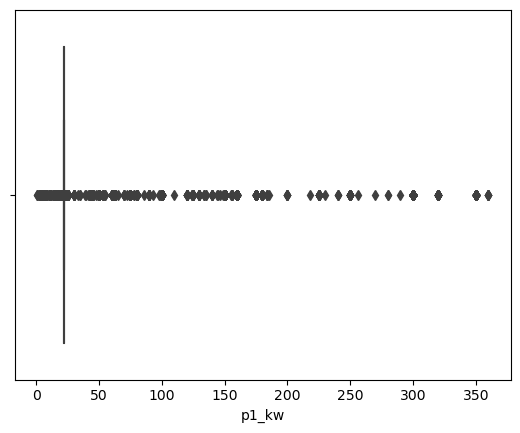

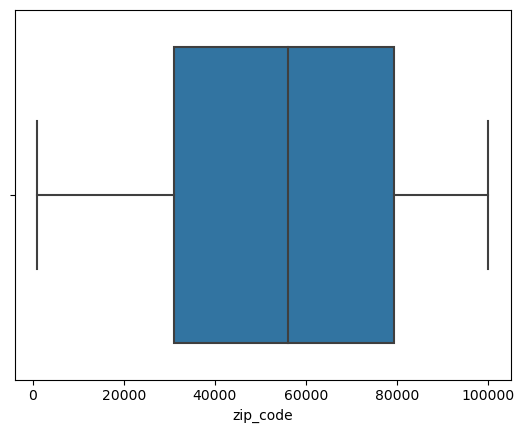

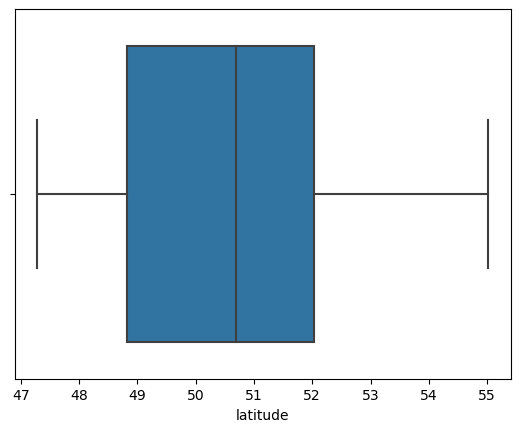

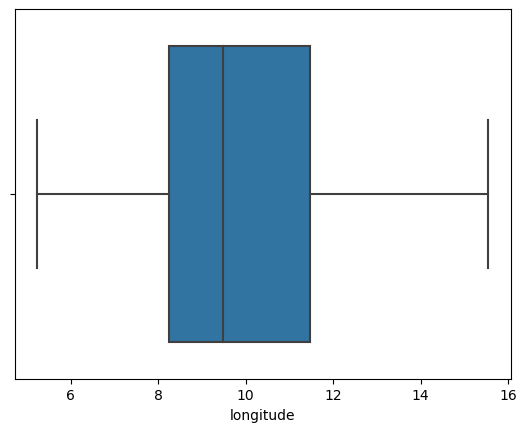

In [46]:
#checking for outliers
def outlier(Dataframe):
    for column in Dataframe.columns:
        sns.boxplot(x=Dataframe[column])
        plt.show()
    return None
   

outlier(numerical_charging)

In [47]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 20)

In [48]:
rows_to_drop=charging1_df[(charging1_df['type_of_charging_equipment']== 'Standard_charger')&(charging1_df['connected_load']>400) &( charging1_df['connected_load']<1200)]
rows_to_drop.index

Index([3067, 23582], dtype='int64')

In [49]:
charging2_df=charging1_df.drop([3067, 23582], axis=0)
charging2_df

,operator,type_of_charging_equipment,number_of_charging_points,connected_load,plug_types_1,p1_kw,district_city,city,zip_code,street,house_number,date_of_commissioning,latitude,longitude
0,GGEW AG,Standard_charger,1,4.6,AC Steckdose Typ 2,4.6,Landkreis Bergstraße,Lorsch,64653,Klosterstr.,23,2017-01-02,49.653064,8.572109
1,Pfalzwerke AG,Super_charger,2,75.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Lorsch,64653,Nibelungenstraße,135-137,2021-04-27,49.652969,8.554764
2,ENTEGA Energie GmbH,Standard_charger,2,44.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Fürth,64658,Krumbacher Str.,39,2017-11-21,49.658037,8.787881
3,Entega Plus GmbH,Standard_charger,2,22.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Fürth,64658,Erbacher Str.,102,2022-04-08,49.663670,8.796830
4,Entega Plus GmbH,Standard_charger,2,22.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Fürth,64658,Schulstr.,12,2022-04-08,49.646360,8.781410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,108,2016-06-01,51.301227,12.384566
36766,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Scheffelstraße,35,2016-06-01,51.311695,12.372912
36767,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,55,2018-07-05,51.305046,12.382487
36768,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Richard Lehmann Straße,120,2019-08-12,51.314325,12.397213


In [50]:
charging2_df[(charging2_df['type_of_charging_equipment']== 'Standard_charger')&(charging2_df['connected_load']>400) &( charging2_df['connected_load']<1200)]

,operator,type_of_charging_equipment,number_of_charging_points,connected_load,plug_types_1,p1_kw,district_city,city,zip_code,street,house_number,date_of_commissioning,latitude,longitude


In [51]:
charging1_df['p1_kw'].describe()

count    36281.000000
mean        37.724963
std         58.912162
min          1.000000
25%         22.000000
50%         22.000000
75%         22.000000
max        360.000000
Name: p1_kw, dtype: float64

In [52]:
charging2_df[(charging2_df['type_of_charging_equipment']== 'Standard_charger')]

,operator,type_of_charging_equipment,number_of_charging_points,connected_load,plug_types_1,p1_kw,district_city,city,zip_code,street,house_number,date_of_commissioning,latitude,longitude
0,GGEW AG,Standard_charger,1,4.6,AC Steckdose Typ 2,4.6,Landkreis Bergstraße,Lorsch,64653,Klosterstr.,23,2017-01-02,49.653064,8.572109
2,ENTEGA Energie GmbH,Standard_charger,2,44.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Fürth,64658,Krumbacher Str.,39,2017-11-21,49.658037,8.787881
3,Entega Plus GmbH,Standard_charger,2,22.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Fürth,64658,Erbacher Str.,102,2022-04-08,49.663670,8.796830
4,Entega Plus GmbH,Standard_charger,2,22.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Fürth,64658,Schulstr.,12,2022-04-08,49.646360,8.781410
5,Vogel Autohäuser GmbH & Co. KG,Standard_charger,2,44.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Zwingenberg,64673,Gießer Weg,16,2019-11-24,49.722681,8.602622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,108,2016-06-01,51.301227,12.384566
36766,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Scheffelstraße,35,2016-06-01,51.311695,12.372912
36767,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,55,2018-07-05,51.305046,12.382487
36768,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Richard Lehmann Straße,120,2019-08-12,51.314325,12.397213


In [53]:
charging2_df['avg_kW']=charging2_df['connected_load']/charging2_df['number_of_charging_points']
charging2_df.head()

,operator,type_of_charging_equipment,number_of_charging_points,connected_load,plug_types_1,p1_kw,district_city,city,zip_code,street,house_number,date_of_commissioning,latitude,longitude,avg_kW
0,GGEW AG,Standard_charger,1,4.6,AC Steckdose Typ 2,4.6,Landkreis Bergstraße,Lorsch,64653,Klosterstr.,23,2017-01-02,49.653064,8.572109,4.6
1,Pfalzwerke AG,Super_charger,2,75.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Lorsch,64653,Nibelungenstraße,135-137,2021-04-27,49.652969,8.554764,37.5
2,ENTEGA Energie GmbH,Standard_charger,2,44.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Fürth,64658,Krumbacher Str.,39,2017-11-21,49.658037,8.787881,22.0
3,Entega Plus GmbH,Standard_charger,2,22.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Fürth,64658,Erbacher Str.,102,2022-04-08,49.663670,8.796830,11.0
4,Entega Plus GmbH,Standard_charger,2,22.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Fürth,64658,Schulstr.,12,2022-04-08,49.646360,8.781410,11.0


In [54]:
numerical_charging1=charging2_df.select_dtypes(np.number)

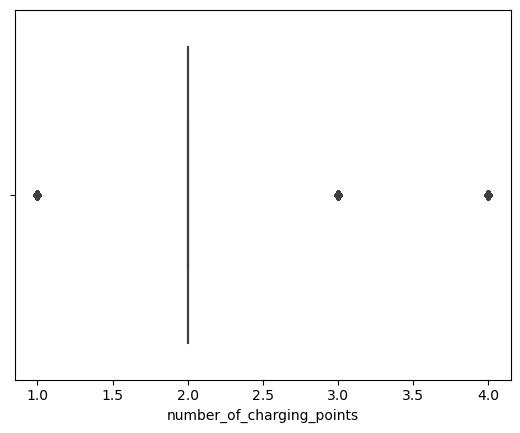

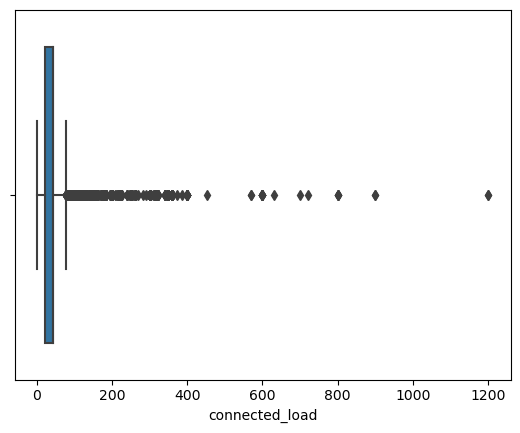

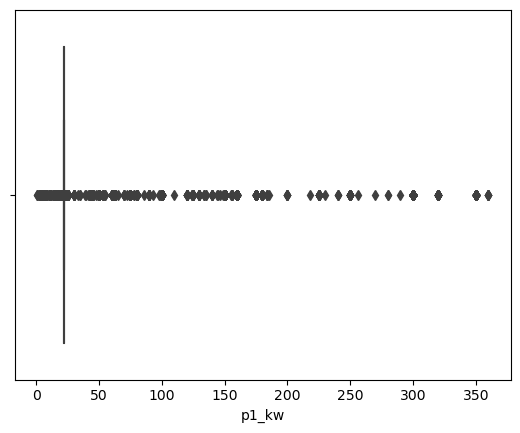

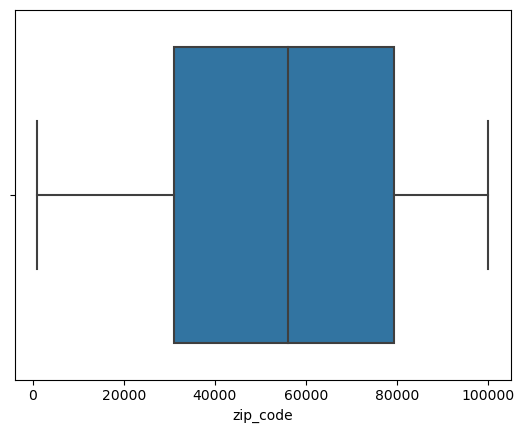

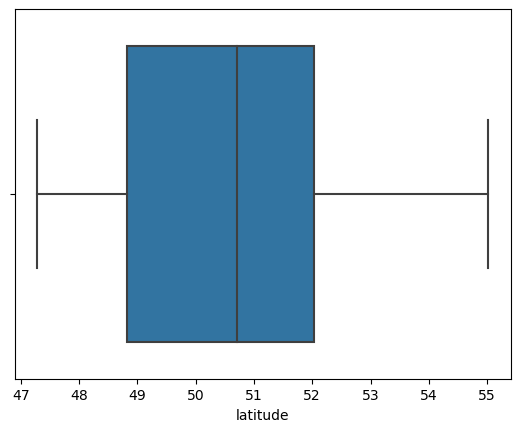

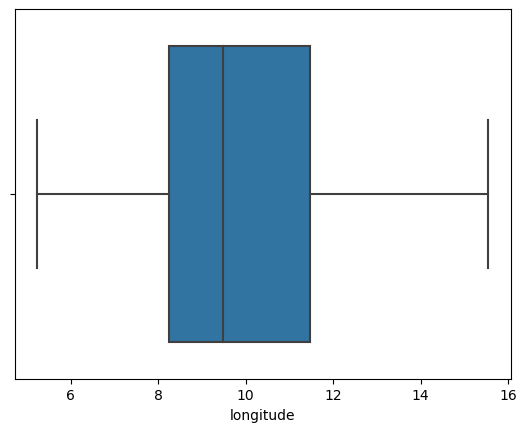

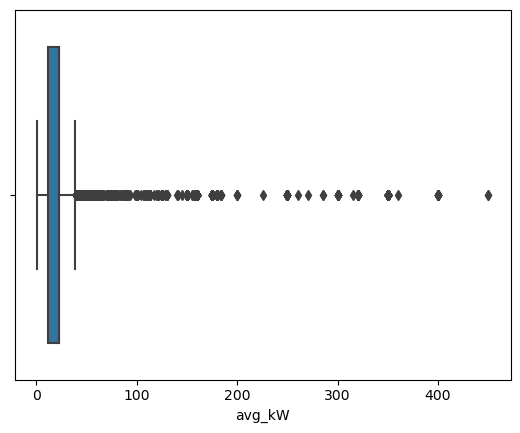

In [55]:
outlier(numerical_charging1)

In [56]:
outliers2=charging2_df[(charging2_df['type_of_charging_equipment']== 'Standard_charger')&(charging2_df['avg_kW']>100) &( charging2_df['connected_load']<1200)]
outliers2.head(25)

,operator,type_of_charging_equipment,number_of_charging_points,connected_load,plug_types_1,p1_kw,district_city,city,zip_code,street,house_number,date_of_commissioning,latitude,longitude,avg_kW
7721,Mer Germany GmbH,Standard_charger,1,110.0,AC Steckdose Typ 2,22.0,Landkreis Mühldorf a. Inn,Mühldorf,84453,Münchener Strasse,82,2022-10-26,48.245771,12.508762,110.0
7863,Gemeinde Unterföhring,Standard_charger,1,400.0,AC Steckdose Typ 2,22.0,Landkreis München,Unterföhring,85774,Jahnstraße,9,2018-12-01,48.192941,11.655424,400.0
7864,Gemeinde Unterföhring,Standard_charger,1,400.0,AC Steckdose Typ 2,22.0,Landkreis München,Unterföhring,85774,Jahnstraße,9,2018-12-01,48.192874,11.655419,400.0
7865,Gemeinde Unterföhring,Standard_charger,1,400.0,AC Steckdose Typ 2,22.0,Landkreis München,Unterföhring,85774,Am Bahnhof,13,2019-06-25,48.189498,11.646310,400.0
7866,Gemeinde Unterföhring,Standard_charger,1,160.0,AC Steckdose Typ 2,22.0,Landkreis München,Unterföhring,85774,Dieselstraße,15,2020-09-07,48.185505,11.653060,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25744,Gemeinde Unterföhring,Standard_charger,1,400.0,AC Steckdose Typ 2,22.0,Landkreis München,Unterföhring,85774,Am Bahnhof,13,2019-06-25,48.189687,11.646449,400.0
25745,Gemeinde Unterföhring,Standard_charger,1,160.0,AC Steckdose Typ 2,22.0,Landkreis München,Unterföhring,85774,Dieselstraße,15,2020-09-07,48.185508,11.651230,160.0
25746,Gemeinde Unterföhring,Standard_charger,1,160.0,AC Steckdose Typ 2,22.0,Landkreis München,Unterföhring,85774,Dieselstraße,15,2020-09-07,48.185030,11.653440,160.0
25747,Gemeinde Unterföhring,Standard_charger,1,160.0,AC Steckdose Typ 2,22.0,Landkreis München,Unterföhring,85774,Dieselstraße,15,2020-09-07,48.184980,11.654580,160.0


In [57]:
outliers2.shape

(25, 15)

In [58]:
#since all the standard chargers that have a connected load between 100-1200 kW have 1 charging point (except 1), I'm deciding to consider them as outliers and dropping them
rows_to_drop1=charging2_df[(charging2_df['type_of_charging_equipment']== 'Standard_charger')&(charging2_df['avg_kW']>100) &( charging2_df['avg_kW']<1200)]
rows_to_drop1.index

Index([ 7721,  7863,  7864,  7865,  7866,  7867,  7868,  7869, 14575, 14603,
       14683, 14684, 14687, 14688, 14689, 14690, 25740, 25741, 25742, 25743,
       25744, 25745, 25746, 25747, 29994],
      dtype='int64')

In [59]:
charging3_df=charging2_df.drop([7721,  7863,  7864,  7865,  7866,  7867,  7868,  7869, 14575, 14603,
       14683, 14684, 14687, 14688, 14689, 14690, 25740, 25741, 25742, 25743,
       25744, 25745, 25746, 25747, 29994], axis=0)
charging3_df

,operator,type_of_charging_equipment,number_of_charging_points,connected_load,plug_types_1,p1_kw,district_city,city,zip_code,street,house_number,date_of_commissioning,latitude,longitude,avg_kW
0,GGEW AG,Standard_charger,1,4.6,AC Steckdose Typ 2,4.6,Landkreis Bergstraße,Lorsch,64653,Klosterstr.,23,2017-01-02,49.653064,8.572109,4.6
1,Pfalzwerke AG,Super_charger,2,75.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Lorsch,64653,Nibelungenstraße,135-137,2021-04-27,49.652969,8.554764,37.5
2,ENTEGA Energie GmbH,Standard_charger,2,44.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Fürth,64658,Krumbacher Str.,39,2017-11-21,49.658037,8.787881,22.0
3,Entega Plus GmbH,Standard_charger,2,22.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Fürth,64658,Erbacher Str.,102,2022-04-08,49.663670,8.796830,11.0
4,Entega Plus GmbH,Standard_charger,2,22.0,AC Steckdose Typ 2,22.0,Landkreis Bergstraße,Fürth,64658,Schulstr.,12,2022-04-08,49.646360,8.781410,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,108,2016-06-01,51.301227,12.384566,15.0
36766,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Scheffelstraße,35,2016-06-01,51.311695,12.372912,15.0
36767,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,55,2018-07-05,51.305046,12.382487,15.0
36768,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Steckdose Typ 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Richard Lehmann Straße,120,2019-08-12,51.314325,12.397213,15.0


In [60]:
charging3_df[(charging3_df['type_of_charging_equipment']== 'Standard_charger')&(charging3_df['avg_kW']>100) &( charging3_df['connected_load']<1200)]
#outliers eliminated

,operator,type_of_charging_equipment,number_of_charging_points,connected_load,plug_types_1,p1_kw,district_city,city,zip_code,street,house_number,date_of_commissioning,latitude,longitude,avg_kW


In [61]:
#now will explore the super chargers
charging3_df[(charging3_df['type_of_charging_equipment']== 'Super_charger')&(charging3_df['avg_kW']>100) &( charging3_df['connected_load']<1200)]


,operator,type_of_charging_equipment,number_of_charging_points,connected_load,plug_types_1,p1_kw,district_city,city,zip_code,street,house_number,date_of_commissioning,latitude,longitude,avg_kW
50,Mer Germany GmbH,Super_charger,2,250.0,"DC Kupplung Combo, DC CHAdeMO",50.0,Landkreis Darmstadt-Dieburg,Alsbach,64665,Alsbach West,0,2017-05-11,49.746893,8.591679,125.0
55,EnBW mobility+ AG und Co.KG,Super_charger,2,300.0,DC Kupplung Combo,300.0,Landkreis Darmstadt-Dieburg,Groß-Umstadt,64823,Georg-August-Zinn-Straße,92,2022-02-07,49.871204,8.916913,150.0
94,IONITY GmbH,Super_charger,1,350.0,DC Kupplung Combo,350.0,Landkreis Fulda,Eichenzell,36124,Eichenzell,0,2018-11-30,50.488351,9.708473,350.0
102,Mer Germany GmbH,Super_charger,2,600.0,"DC Kupplung Combo, DC CHAdeMO",225.0,Landkreis Fulda,Uttrichshausen,36148,Autobahn A7,0,2021-10-25,50.420008,9.737530,300.0
113,EnBW mobility+ AG und Co.KG,Super_charger,2,300.0,DC Kupplung Combo,300.0,Landkreis Gießen,Giessen,35394,Stefan-Bellof-Strasse,2,2020-08-19,50.575162,8.711753,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36654,Chemnitzer Siedlungsgemeinschaft eG,Super_charger,1,175.0,"DC Kupplung Combo, DC CHAdeMO",175.0,Kreisfreie Stadt Chemnitz,Chemnitz,9112,Kaßbergstraße,20,2020-07-02,50.834260,12.910731,175.0
36664,Grüne Säule,Super_charger,1,350.0,"DC Kupplung Combo, DC CHAdeMO",350.0,Kreisfreie Stadt Chemnitz,Chemnitz,9116,Carl-von-Bach-Straße,8a,2019-12-02,50.802493,12.852032,350.0
36679,EnBW mobility+ AG und Co.KG,Super_charger,2,300.0,DC Kupplung Combo,300.0,Kreisfreie Stadt Chemnitz,Chemnitz,9123,Chemnitzer Str.,65,2022-07-18,50.783191,12.896768,150.0
36686,EnBW mobility+ AG und Co.KG,Super_charger,2,300.0,DC Kupplung Combo,300.0,Kreisfreie Stadt Chemnitz,Chemnitz,9126,Zschopauer Str.,273,2021-11-17,50.485240,12.571980,150.0


In [62]:
charging3_df[(charging3_df['type_of_charging_equipment']== 'Super_charger')&(charging3_df['avg_kW']>399) &( charging3_df['connected_load']<1200)]


,operator,type_of_charging_equipment,number_of_charging_points,connected_load,plug_types_1,p1_kw,district_city,city,zip_code,street,house_number,date_of_commissioning,latitude,longitude,avg_kW
5993,Mer Germany GmbH,Super_charger,2,900.0,DC Kupplung Combo,300.0,Kreisfreie Stadt Zweibrücken,Zweibrücken,66482,Stockholmer,0,2020-11-09,49.229229,7.410162,450.0
5994,Mer Germany GmbH,Super_charger,2,900.0,DC Kupplung Combo,300.0,Kreisfreie Stadt Zweibrücken,Zweibrücken,66482,Stockholmer Straße,0,2020-11-09,49.229229,7.410162,450.0
18997,Mer Germany GmbH,Super_charger,2,800.0,"DC Kupplung Combo, DC CHAdeMO",225.0,Landkreis Fulda,Fulda,36039,Michelsrombacher Str.,4,2021-08-13,50.581498,9.706727,400.0
27476,Mer Germany GmbH,Super_charger,2,800.0,DC Kupplung Combo,225.0,Landkreis Fulda,Fulda,36039,Michelsrombacher Str.,4,2021-08-13,50.581498,9.706727,400.0


In [63]:
#will not eliminate any of the superchargers

In [64]:
categorical_cars=cars_df.select_dtypes(object)
categorical_cars

,brand,commercial_name,fuel_type,month
0,HONDA UK,JA,Petrol,Undefined
1,HONDA UK,JA,Petrol,Undefined
2,HONDA UK,JA,Petrol,Undefined
3,HONDA UK,JA,Petrol,Undefined
4,HONDA UK,JA,Petrol,Undefined
...,...,...,...,...
15048849,DUPLICATE,TOYOTA RAV4,PETROL,8.0
15048850,DUPLICATE,BAYON,PETROL,8.0
15048851,DUPLICATE,BAYON,PETROL,8.0
15048852,DUPLICATE,I 30,PETROL,4.0


In [65]:
cars_df['fuel_type'].value_counts()

fuel_type
PETROL             6291825
DIESEL             3119208
petrol             2254509
diesel             1160998
ELECTRIC           1057268
                    ...   
unknown                108
Diesel-electric         51
Diesel/Electric         37
ng                       8
e85                      2
Name: count, Length: 29, dtype: int64

In [66]:
#making the fuel types standardized
value_mapping = {'NG': 'ng','NG-BIOMETHANE': 'ng-biomethane','NG-biomethane': 'ng-biomethane', 'Petrol':'petrol', 'PETROL':'petrol',  'PETROL/ELECTRIC':'petrol/electric', 'Petrol-electric':'petrol/electric','Petrol/Electric':'petrol/electric','DIESEL':'diesel','DIESEL/ELECTRIC':'diesel/electric','Diesel':'diesel','Diesel-electric':'diesel/electric','Diesel/Electric':'diesel/electric','ELECTRIC':'electric','Electric':'electric','LPG':'lpg','HYDROGEN':'hydrogen','E85':'e85','UNKNOWN':'unknown' }

# Replace values in the column
cars_df['fuel_type'] = cars_df['fuel_type'].replace(value_mapping)

In [67]:
cars_df['fuel_type'].value_counts()

fuel_type
petrol             8575529
diesel             4310877
electric           1120455
petrol/electric     893511
diesel/electric      71058
lpg                  43777
ng                   16534
ng-biomethane        15878
hydrogen               831
unknown                260
e85                    144
Name: count, dtype: int64

In [68]:
categorical_charging= charging3_df.select_dtypes(object)
categorical_charging

,operator,type_of_charging_equipment,plug_types_1,district_city,city,street,house_number,date_of_commissioning
0,GGEW AG,Standard_charger,AC Steckdose Typ 2,Landkreis Bergstraße,Lorsch,Klosterstr.,23,2017-01-02
1,Pfalzwerke AG,Super_charger,AC Steckdose Typ 2,Landkreis Bergstraße,Lorsch,Nibelungenstraße,135-137,2021-04-27
2,ENTEGA Energie GmbH,Standard_charger,AC Steckdose Typ 2,Landkreis Bergstraße,Fürth,Krumbacher Str.,39,2017-11-21
3,Entega Plus GmbH,Standard_charger,AC Steckdose Typ 2,Landkreis Bergstraße,Fürth,Erbacher Str.,102,2022-04-08
4,Entega Plus GmbH,Standard_charger,AC Steckdose Typ 2,Landkreis Bergstraße,Fürth,Schulstr.,12,2022-04-08
...,...,...,...,...,...,...,...,...
36765,Stadtwerke Leipzig GmbH,Standard_charger,AC Steckdose Typ 2,Kreisfreie Stadt Leipzig,Leipzig,Bornaische Straße,108,2016-06-01
36766,Stadtwerke Leipzig GmbH,Standard_charger,AC Steckdose Typ 2,Kreisfreie Stadt Leipzig,Leipzig,Scheffelstraße,35,2016-06-01
36767,Stadtwerke Leipzig GmbH,Standard_charger,AC Steckdose Typ 2,Kreisfreie Stadt Leipzig,Leipzig,Bornaische Straße,55,2018-07-05
36768,Stadtwerke Leipzig GmbH,Standard_charger,AC Steckdose Typ 2,Kreisfreie Stadt Leipzig,Leipzig,Richard Lehmann Straße,120,2019-08-12


In [69]:
categorical_charging['plug_types_1'].value_counts()

plug_types_1
AC Steckdose Typ 2                                                  25200
DC Kupplung Combo                                                    4115
AC Kupplung Typ 2                                                    2432
AC Steckdose Typ 2, AC Schuko                                        2342
DC Kupplung Combo, DC CHAdeMO                                        1176
                                                                    ...  
AC Steckdose Typ 2, AC Kupplung Typ 2, AC Schuko, AC CEE 5 polig        1
DC Kupplung Combo, AC CEE 3 polig                                       1
AC Schuko, AC CEE 5 polig                                               1
AC Steckdose Typ 2, DC Kupplung Combo, AC Schuko                        1
AC Steckdose Typ 2, CEE-Stecker                                         1
Name: count, Length: 41, dtype: int64

In [70]:
#translate different pulg type names: 
charging3_df['plug_types_1'] = charging3_df['plug_types_1'].str.replace('Steckdose', 'Socket').str.replace('Kupplung', 'Coupler').str.replace('Stecker', 'Plug').str.replace('Typ', 'Type')
charging3_df['plug_types_1'].value_counts()

plug_types_1
AC Socket Type 2                                                  25200
DC Coupler Combo                                                   4115
AC Coupler Type 2                                                  2432
AC Socket Type 2, AC Schuko                                        2342
DC Coupler Combo, DC CHAdeMO                                       1176
                                                                  ...  
AC Socket Type 2, AC Coupler Type 2, AC Schuko, AC CEE 5 polig        1
DC Coupler Combo, AC CEE 3 polig                                      1
AC Schuko, AC CEE 5 polig                                             1
AC Socket Type 2, DC Coupler Combo, AC Schuko                         1
AC Socket Type 2, CEE-Plug                                            1
Name: count, Length: 41, dtype: int64

In [71]:
charging3_df['date_of_commissioning'] = pd.to_datetime(charging3_df['date_of_commissioning'])

# Extract month and year
charging3_df['month'] = charging3_df['date_of_commissioning'].dt.month
charging3_df['year'] = charging3_df['date_of_commissioning'].dt.year

charging3_df.head(50)

,operator,type_of_charging_equipment,number_of_charging_points,connected_load,plug_types_1,p1_kw,district_city,city,zip_code,street,house_number,date_of_commissioning,latitude,longitude,avg_kW,month,year
0,GGEW AG,Standard_charger,1,4.6,AC Socket Type 2,4.6,Landkreis Bergstraße,Lorsch,64653,Klosterstr.,23,2017-01-02,49.653064,8.572109,4.6,1,2017
1,Pfalzwerke AG,Super_charger,2,75.0,AC Socket Type 2,22.0,Landkreis Bergstraße,Lorsch,64653,Nibelungenstraße,135-137,2021-04-27,49.652969,8.554764,37.5,4,2021
2,ENTEGA Energie GmbH,Standard_charger,2,44.0,AC Socket Type 2,22.0,Landkreis Bergstraße,Fürth,64658,Krumbacher Str.,39,2017-11-21,49.658037,8.787881,22.0,11,2017
3,Entega Plus GmbH,Standard_charger,2,22.0,AC Socket Type 2,22.0,Landkreis Bergstraße,Fürth,64658,Erbacher Str.,102,2022-04-08,49.663670,8.796830,11.0,4,2022
4,Entega Plus GmbH,Standard_charger,2,22.0,AC Socket Type 2,22.0,Landkreis Bergstraße,Fürth,64658,Schulstr.,12,2022-04-08,49.646360,8.781410,11.0,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,WILLI KRÄMER KG,Standard_charger,1,11.0,"AC Socket Type 2, AC Coupler Type 2",11.0,Landkreis Darmstadt-Dieburg,Gross-Bieberau,64401,LICHTENBERGERSTR.,66,2021-01-01,49.791380,8.821769,11.0,1,2021
46,WILLI KRÄMER KG,Standard_charger,2,39.6,DC Coupler Combo,22.0,Landkreis Darmstadt-Dieburg,Groß-Bieberau,64401,Lichtenberger Str.,66,2021-01-19,49.791339,8.821700,19.8,1,2021
47,GGEW AG,Standard_charger,1,4.6,AC Socket Type 2,4.6,Landkreis Darmstadt-Dieburg,Bickenbach,64404,Darmstädter Str.,7,2017-01-02,49.753710,8.611994,4.6,1,2017
48,Entega Plus GmbH,Standard_charger,2,22.0,AC Socket Type 2,22.0,Landkreis Darmstadt-Dieburg,Messel,64409,Kohlweg,15,2021-10-19,49.936635,8.744222,11.0,10,2021


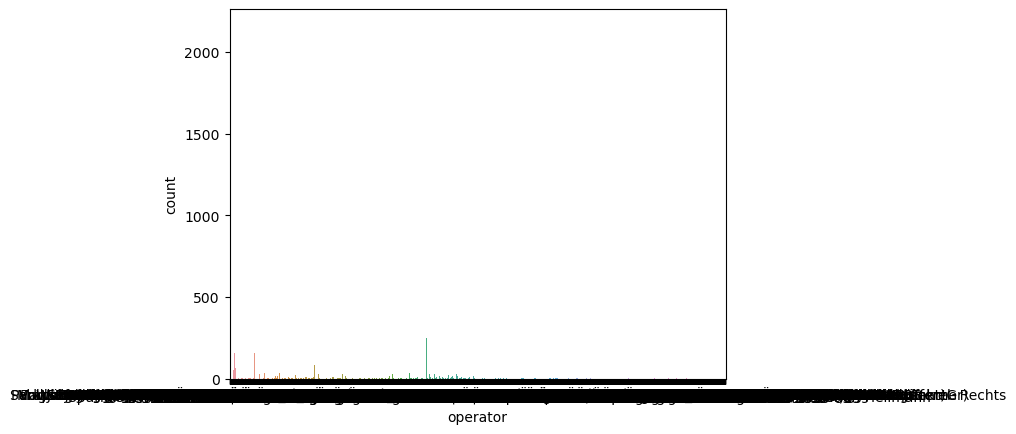

In [81]:
sns.countplot(data=charging3_df, x='operator')

# Rotation of the x-axis labels for better readability
#plt.xticks(rotation=45)

# Show the plot
plt.show()

In [73]:
charging3_df['operator'].value_counts()

operator
E.ON Drive GmbH                                 2153
EnBW mobility+ AG und Co.KG                     1998
EWE Go GmbH                                      894
Mercedes-Benz AG                                 825
Westenergie Metering GmbH                        794
                                                ... 
Ambulanter Pflegedienst Angelika Müller e.K.       1
Kliniken Dr. Erler gGmbH                           1
Willi Kippes                                       1
Arvena Park Hotel                                  1
Ingenieurbüro                                      1
Name: count, Length: 4771, dtype: int64

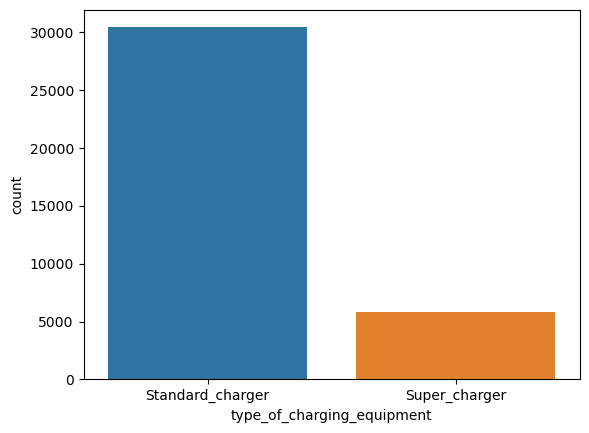

In [74]:
sns.countplot(data=charging3_df, x='type_of_charging_equipment')

# Rotation of the x-axis labels for better readability
#plt.xticks(rotation=45)

# Show the plot
plt.show()

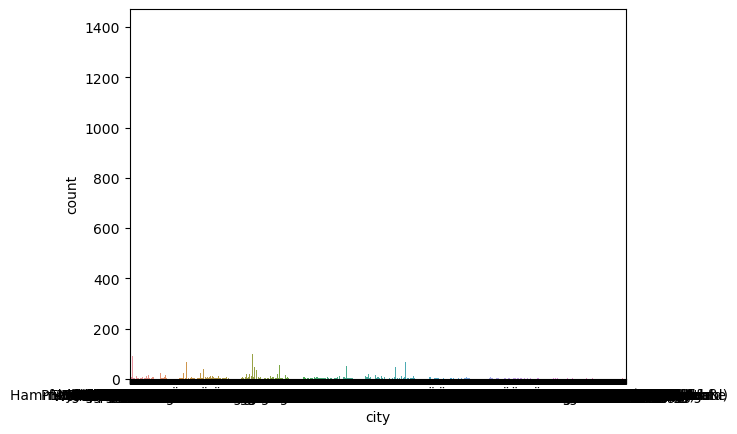

In [75]:
sns.countplot(data=charging3_df, x='city')

# Rotation of the x-axis labels for better readability
#plt.xticks(rotation=45)

# Show the plot
plt.show()

In [76]:
charging3_df['city'].value_counts()

city
München                    1401
Berlin                     1224
Hamburg                     936
Stuttgart                   696
Hannover                    470
                           ... 
Neustadt a. d. Waldnaab       1
Floß                          1
Eslarn                        1
Illertissen-Jedesheim         1
Leipzig - Alt-West            1
Name: count, Length: 5960, dtype: int64

In [77]:
charging3_df

,operator,type_of_charging_equipment,number_of_charging_points,connected_load,plug_types_1,p1_kw,district_city,city,zip_code,street,house_number,date_of_commissioning,latitude,longitude,avg_kW,month,year
0,GGEW AG,Standard_charger,1,4.6,AC Socket Type 2,4.6,Landkreis Bergstraße,Lorsch,64653,Klosterstr.,23,2017-01-02,49.653064,8.572109,4.6,1,2017
1,Pfalzwerke AG,Super_charger,2,75.0,AC Socket Type 2,22.0,Landkreis Bergstraße,Lorsch,64653,Nibelungenstraße,135-137,2021-04-27,49.652969,8.554764,37.5,4,2021
2,ENTEGA Energie GmbH,Standard_charger,2,44.0,AC Socket Type 2,22.0,Landkreis Bergstraße,Fürth,64658,Krumbacher Str.,39,2017-11-21,49.658037,8.787881,22.0,11,2017
3,Entega Plus GmbH,Standard_charger,2,22.0,AC Socket Type 2,22.0,Landkreis Bergstraße,Fürth,64658,Erbacher Str.,102,2022-04-08,49.663670,8.796830,11.0,4,2022
4,Entega Plus GmbH,Standard_charger,2,22.0,AC Socket Type 2,22.0,Landkreis Bergstraße,Fürth,64658,Schulstr.,12,2022-04-08,49.646360,8.781410,11.0,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Socket Type 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,108,2016-06-01,51.301227,12.384566,15.0,6,2016
36766,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Socket Type 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Scheffelstraße,35,2016-06-01,51.311695,12.372912,15.0,6,2016
36767,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Socket Type 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,55,2018-07-05,51.305046,12.382487,15.0,7,2018
36768,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Socket Type 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4277,Richard Lehmann Straße,120,2019-08-12,51.314325,12.397213,15.0,8,2019


In [78]:
charging3_df.to_csv('charging_final.csv', index=False)

In [79]:
cars_df.head(50)
#charging3_df.to_csv('charging_final.csv', index=False)

,brand,commercial_name,fuel_type,year,month
0,HONDA UK,JA,petrol,2015,Undefined
1,HONDA UK,JA,petrol,2015,Undefined
2,HONDA UK,JA,petrol,2015,Undefined
3,HONDA UK,JA,petrol,2015,Undefined
4,HONDA UK,JA,petrol,2015,Undefined
...,...,...,...,...,...
45,HYUNDAI,I40,diesel,2015,Undefined
46,HYUNDAI,UNKNOWN,petrol,2015,Undefined
47,HYUNDAI,UNKNOWN,petrol,2015,Undefined
48,HYUNDAI,UNKNOWN,electric,2015,Undefined


In [80]:
cars_df.to_csv('cars_final.csv', index=False)

In [100]:
super_charger = charging3_df[(charging3_df['type_of_charging_equipment']== 'Super_charger')&(charging3_df['year']==2021)]
super_charger

,operator,type_of_charging_equipment,number_of_charging_points,connected_load,plug_types_1,p1_kw,district_city,city,zip_code,street,house_number,date_of_commissioning,latitude,longitude,avg_kW,month,year
1,Pfalzwerke AG,Super_charger,2,75.0,AC Socket Type 2,22.0,Landkreis Bergstraße,Lorsch,64653,Nibelungenstraße,135-137,2021-04-27,49.652969,8.554764,37.5,4,2021
102,Mer Germany GmbH,Super_charger,2,600.0,"DC Coupler Combo, DC CHAdeMO",225.0,Landkreis Fulda,Uttrichshausen,36148,Autobahn A7,0,2021-10-25,50.420008,9.737530,300.0,10,2021
302,IONITY GmbH,Super_charger,1,350.0,DC Coupler Combo,350.0,Landkreis Hersfeld-Rotenburg,Kirchheim,36275,Kirchheim,0,2021-06-01,50.833765,9.571157,350.0,6,2021
375,Lidl,Super_charger,3,93.0,"AC Socket Type 2, AC Coupler Type 2",50.0,Landkreis Kassel,Vellmar,34246,Harleshäuser Str.,21,2021-10-26,51.355365,9.449632,31.0,10,2021
377,Pfalzwerke AG,Super_charger,2,75.0,AC Socket Type 2,22.0,Landkreis Kassel,Lohfelden,34253,Otto-Hahn-Straße 1 -,5,2021-01-13,51.279552,9.528262,37.5,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36667,Lidl,Super_charger,3,93.0,"AC Socket Type 2, AC Coupler Type 2",50.0,Kreisfreie Stadt Chemnitz,Chemnitz-Helbersdorf,9120,Paul-Bertz-Str.,14,2021-09-07,50.802433,12.886539,31.0,9,2021
36685,EnBW mobility+ AG und Co.KG,Super_charger,2,150.0,DC Coupler Combo,150.0,Kreisfreie Stadt Chemnitz,Chemnitz,9126,Zschopauer Str.,273,2021-11-17,50.485240,12.571980,75.0,11,2021
36686,EnBW mobility+ AG und Co.KG,Super_charger,2,300.0,DC Coupler Combo,300.0,Kreisfreie Stadt Chemnitz,Chemnitz,9126,Zschopauer Str.,273,2021-11-17,50.485240,12.571980,150.0,11,2021
36697,SachsenEnergie AG,Super_charger,2,100.0,"DC Coupler Combo, DC CHAdeMO",75.0,Kreisfreie Stadt Dresden,Dresden,1067,Freiberger Straße,0A,2021-06-28,51.049705,13.722658,50.0,6,2021


In [99]:
standard_charger = charging3_df[(charging3_df['type_of_charging_equipment']== 'Standard_charger')&(charging3_df['year']==2021)]
standard_charger

,operator,type_of_charging_equipment,number_of_charging_points,connected_load,plug_types_1,p1_kw,district_city,city,zip_code,street,house_number,date_of_commissioning,latitude,longitude,avg_kW,month,year
8,ALDI SÜD,Standard_charger,2,44.0,AC Socket Type 2,22.0,Landkreis Bergstraße,Lautertal,64686,Nibelungenstraße,349-351,2021-02-16,49.711272,8.703318,22.0,2,2021
10,inno2grid GmbH,Standard_charger,2,22.0,AC Socket Type 2,22.0,Landkreis Bergstraße,Grasellenbach,64689,Nibelungenstr,33a,2021-10-01,49.613629,8.855852,11.0,10,2021
11,ALDI SÜD,Standard_charger,2,44.0,AC Socket Type 2,22.0,Landkreis Bergstraße,Viernheim,68519,Heidelbergerstraße,61,2021-05-20,49.537029,8.590752,22.0,5,2021
17,Stadtwerke Weinheim GmbH,Standard_charger,1,22.0,AC Socket Type 2,22.0,Landkreis Bergstraße,Hüttenfeld,68623,Viernheimer Straße,54,2021-11-11,49.594150,8.589247,22.0,11,2021
37,ALDI SÜD,Standard_charger,2,44.0,AC Socket Type 2,22.0,Landkreis Darmstadt-Dieburg,Roßdorf,64380,Theodor-Claussen-Strasse,10,2021-03-09,49.861417,8.764180,22.0,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36749,E.ON Drive GmbH,Standard_charger,1,11.0,AC Socket Type 2,11.0,Kreisfreie Stadt Leipzig,Leipzig,4109,Petersstraße,36-44,2021-01-21,51.336699,12.372291,11.0,1,2021
36751,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Socket Type 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4157,Heinrich-Budde-Straße,24,2021-06-18,51.369033,12.370320,15.0,6,2021
36755,Stadtwerke Leipzig GmbH,Standard_charger,2,30.0,AC Socket Type 2,22.0,Kreisfreie Stadt Leipzig,Leipzig,4177,Aurelienstraße,54,2021-05-11,51.332435,12.329557,15.0,5,2021
36760,Hercher Die Service Familie GmbH,Standard_charger,2,39.6,DC Coupler Combo,22.0,Kreisfreie Stadt Leipzig,Leipzig,4179,Saarländer Str.,10,2021-01-19,51.326445,12.311886,19.8,1,2021


In [88]:
charging3_df['year'].value_counts()

year
2022    8918
2021    7664
2020    5536
2019    4795
2018    3770
2017    1878
2023    1163
2016    1126
2015     520
2014     250
2011     198
2012     181
2013     128
2010      70
2009      52
2007       2
2008       1
2001       1
1992       1
Name: count, dtype: int64

In [101]:
charger_counts = charging3_df.groupby(['year', 'type_of_charging_equipment']).size().unstack(fill_value=0)
charger_counts

type_of_charging_equipment,Standard_charger,Super_charger
year,,
1992,1,0
2001,1,0
2007,2,0
2008,1,0
2009,52,0
2010,70,0
2011,197,1
2012,179,2
2013,128,0


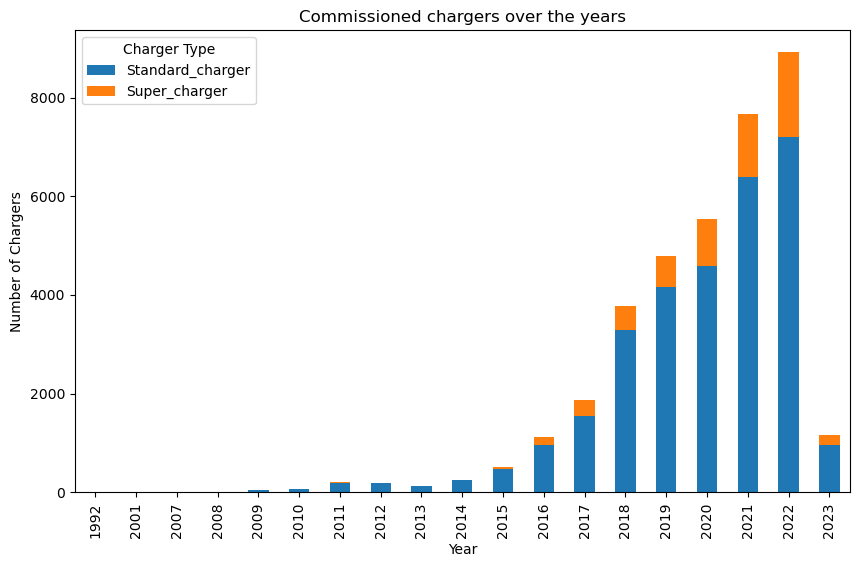

In [102]:
charger_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Commissioned chargers over the years')
plt.xlabel('Year')
plt.ylabel('Number of Chargers')
plt.legend(title='Charger Type')
plt.show()